In [ ]:
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
import pandas as pd

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# player dictionary
nba_players = players.get_players()
player_dict = [player for player in nba_players if player['full_name'] == 'Aaron Gordon'][0]
# career df
career = playercareerstats.PlayerCareerStats(player_id=player_dict['id'])
career_df = career.get_data_frames()[0]
career_df

In [ ]:
season_id = '2022-23'
# team id during the season
team_id = career_df[career_df['SEASON_ID'] == season_id]['TEAM_ID']

# shotchardtdetail endpoint
shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id), 
                                                player_id=int(player_dict['id']), 
                                                season_type_all_star='Regular Season', 
                                                season_nullable=season_id,
                                                context_measure_simple="FGA").get_data_frames()

In [ ]:
shotchartlist[0]

In [ ]:
shotchartlist[1]

# Draw Court

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (12, 11)
plt.figure(facecolor='black')
lw = 2
color = 'white'
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
#plt.axis('off')
ax.set_facecolor("black")
ax.set_xlim((-250, 250))
ax.set_ylim((422.5, -47.5))

# 新增底圖
# img = plt.imread("ttttttt.jpeg")
# ax.imshow(img, extent=[-250, 250, -47.5, 422.5])

hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

# Create backboard
backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)


center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                        linewidth=lw, color=color)
center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                        linewidth=lw, color=color)

# Create the outer box 0f the paint, width=16ft, height=19ft
outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                        fill=False)
# Create the inner box of the paint, widt=12ft, height=19ft
inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                        fill=False)

# Create free throw top arc
top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                        linewidth=lw, color=color, fill=False)
# Create free throw bottom arc
bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                        linewidth=lw, color=color, linestyle='dashed')
# Restricted Zone, it is an arc with 4ft radius from center of the hoop
restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                    color=color)

# Three point line
# Create the right side 3pt lines, it's 14ft long before it arcs
corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                            color=color)
# Create the right side 3pt lines, it's 14ft long before it arcs
corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
# 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                color=color)

outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=3,
                            color=color, fill=False)


court_elements=[hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw,
                restricted, corner_three_a, corner_three_b, three_arc,
                center_outer_arc, center_inner_arc, outer_lines]
for element in court_elements:
    ax.add_patch(element)
ax.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3)
ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker="o", s=100, linewidths=3)
plt.savefig('test.png')

plt.show()

In [ ]:
title = 'test'
color="b"
xlim=(-250, 250) 
ylim=(422.5, -47.5)
line_color="blue"
color="blue"
lw=2
outer_lines=False
flip_court=False
gridsize=None
ax=None
despine=False

/var/folders/hx/lv9cm_b17z71v60pvbndkgvh0000gn/T/ipykernel_96727/2758068348.py:52: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  inner_line_1 = Rectangle((40, 69.28), 80, 0, 60, linewidth=lw, color=color)
/var/folders/hx/lv9cm_b17z71v60pvbndkgvh0000gn/T/ipykernel_96727/2758068348.py:54: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  inner_line_2 = Rectangle((-40, 69.28), 80, 0, 120, linewidth=lw, color=color)
/var/folders/hx/lv9cm_b17z71v60pvbndkgvh0000gn/T/ipykernel_96727/2758068348.py:57: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  inner_line_3 = Rectangle((53.20, 

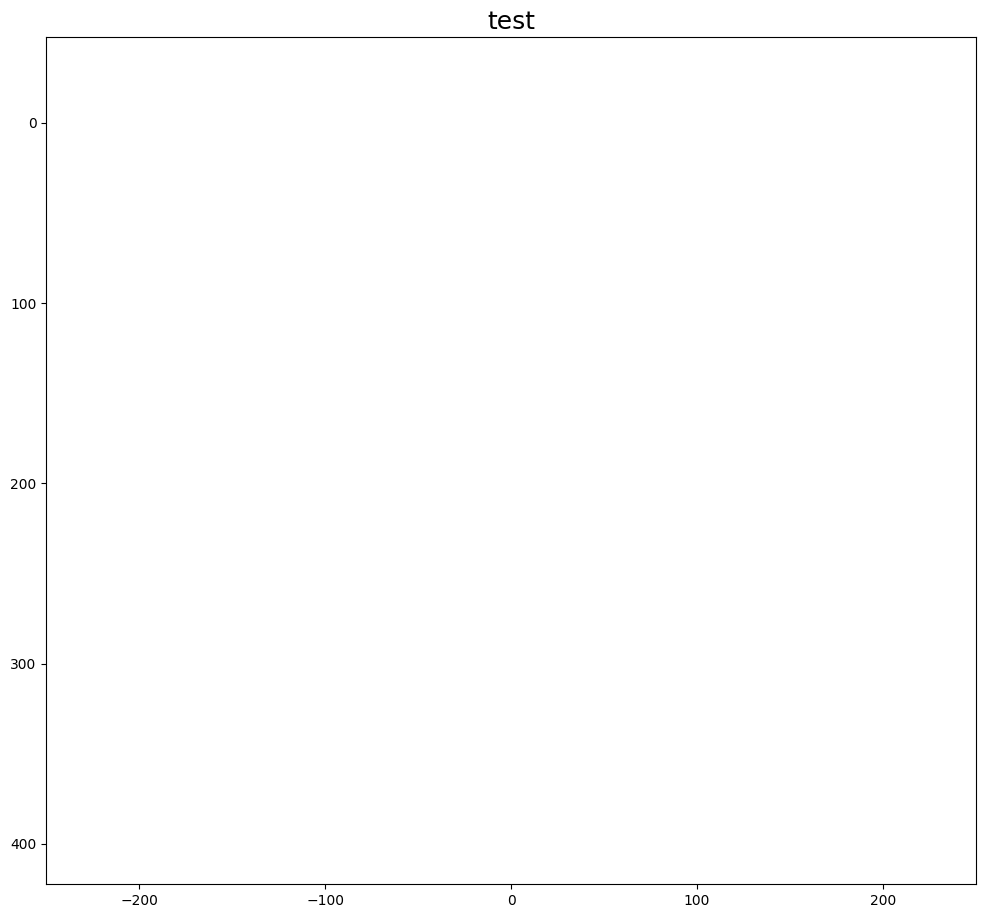

In [184]:
plt.rcParams['figure.figsize'] = (12, 11)

ax = plt.gca()
ax.set_xlim(xlim)
ax.set_ylim(ylim)
# Create the basketball hoop
hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

# Create backboard
backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

# The paint
# Create the outer box 0f the paint, width=16ft, height=19ft
outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                        fill=False)
# Create the inner box of the paint, widt=12ft, height=19ft
inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                        fill=False)

# Create free throw top arc
top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                        linewidth=lw, color=color, fill=False)
# Create free throw bottom arc
bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                        linewidth=lw, color=color, linestyle='dashed')
# Restricted Zone, it is an arc with 4ft radius from center of the hoop
restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                    color=color)

# Three point line
# Create the right side 3pt lines, it's 14ft long before it arcs
corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                            color=color)
# Create the right side 3pt lines, it's 14ft long before it arcs
corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
# 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                color=color)

# Center Court
center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                        linewidth=lw, color=color)
center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                        linewidth=lw, color=color)

inner_circle = Circle((0, 0), radius=80, linewidth=lw, color='black', fill=False)
outer_circle = Circle((0, 0), radius=160, linewidth=lw, color='black', fill=False)
corner_three_a_x =  Rectangle((-250, 92.5), 30, 0, linewidth=lw, color=color)
corner_three_b_x = Rectangle((220, 92.5), 30, 0, linewidth=lw, color=color)

# 60 degrees
inner_line_1 = Rectangle((40, 69.28), 80, 0, 60, linewidth=lw, color=color)
# 120 degrees
inner_line_2 = Rectangle((-40, 69.28), 80, 0, 120, linewidth=lw, color=color)

# Assume x distance is also 40 for the endpoint
inner_line_3 = Rectangle((53.20, 150.89), 290, 0, 70.53, linewidth=lw, color=color)
inner_line_4 = Rectangle((-53.20, 150.89), 290, 0, 109.47, linewidth=lw, color=color)

# Assume y distance is also 92.5 for the endpoint
inner_line_5 = Rectangle((130.54, 92.5), 80, 0, 35.32, linewidth=lw, color=color)
inner_line_6 = Rectangle((-130.54, 92.5), 80, 0, 144.68, linewidth=lw, color=color)
    
    
court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc]
    

ax.tick_params(labelbottom="off", labelleft="off")
ax.set_title(title, fontsize=18)



for element in court_elements:
    ax.add_patch(element)

# plot missed shots
# ax.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3)
# plot made shots
# ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker="o", s=100, linewidths=3)
# plt.savefig('test.png')
plt.show()


In [ ]:
ax = plt.gca()

# Create the various parts of an NBA basketball court

# Create the basketball hoop
hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

# Create backboard
backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

# The paint
# Create the outer box 0f the paint, width=16ft, height=19ft
outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                        fill=False)
# Create the inner box of the paint, widt=12ft, height=19ft
inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                        fill=False)

# Create free throw top arc
top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                        linewidth=lw, color=color, fill=False)
# Create free throw bottom arc
bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                        linewidth=lw, color=color, linestyle='dashed')
# Restricted Zone, it is an arc with 4ft radius from center of the hoop
restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                    color=color)

# Three point line
# Create the right side 3pt lines, it's 14ft long before it arcs
corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                            color=color)
# Create the right side 3pt lines, it's 14ft long before it arcs
corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
# 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                color=color)

# Center Court
center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                        linewidth=lw, color=color)
center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                        linewidth=lw, color=color)

# Draw shotzone Lines
# Based on Advanced Zone Mode
if (shotzone == True):
    inner_circle = Circle((0, 0), radius=80, linewidth=lw, color='black', fill=False)
    outer_circle = Circle((0, 0), radius=160, linewidth=lw, color='black', fill=False)
    corner_three_a_x =  Rectangle((-250, 92.5), 30, 0, linewidth=lw, color=color)
    corner_three_b_x = Rectangle((220, 92.5), 30, 0, linewidth=lw, color=color)
    
    # 60 degrees
    inner_line_1 = Rectangle((40, 69.28), 80, 0, 60, linewidth=lw, color=color)
    # 120 degrees
    inner_line_2 = Rectangle((-40, 69.28), 80, 0, 120, linewidth=lw, color=color)
    
    # Assume x distance is also 40 for the endpoint
    inner_line_3 = Rectangle((53.20, 150.89), 290, 0, 70.53, linewidth=lw, color=color)
    inner_line_4 = Rectangle((-53.20, 150.89), 290, 0, 109.47, linewidth=lw, color=color)
    
    # Assume y distance is also 92.5 for the endpoint
    inner_line_5 = Rectangle((130.54, 92.5), 80, 0, 35.32, linewidth=lw, color=color)
    inner_line_6 = Rectangle((-130.54, 92.5), 80, 0, 144.68, linewidth=lw, color=color)
    
    
    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                        bottom_free_throw, restricted, corner_three_a,
                        corner_three_b, three_arc, center_outer_arc,
                        center_inner_arc, inner_circle, outer_circle,
                        corner_three_a_x, corner_three_b_x,
                        inner_line_1, inner_line_2, inner_line_3, inner_line_4, inner_line_5, inner_line_6]
else:
    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                        bottom_free_throw, restricted, corner_three_a,
                        corner_three_b, three_arc, center_outer_arc,
                        center_inner_arc]

if outer_lines:
    # Draw the half court line, baseline and side out bound lines
    outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                            color=color, fill=False)
    court_elements.append(outer_lines)

# Add the court elements onto the axes
for element in court_elements:
    ax.add_patch(element)
    

In [ ]:
x_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_X']
y_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_Y']

x_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
y_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']

# HEX MAP

In [143]:
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
import numpy as np
from matplotlib.collections import PatchCollection
from scipy.stats import percentileofscore
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [111]:
data = shotchartlist[0]
data2 = shotchartlist[1]
data2.columns

Index(['GRID_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE',
       'FGA', 'FGM', 'FG_PCT'],
      dtype='object')

In [112]:
data.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [119]:
# 聯盟個位置的出手平均及命中率計算
LA = data2.loc[:,['SHOT_ZONE_AREA','SHOT_ZONE_RANGE', 'FGA', 'FGM']].groupby(['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE']).sum()
LA['FGP'] = 1.0*LA['FGM']/LA['FGA']
player = data.groupby(['SHOT_ZONE_AREA','SHOT_ZONE_RANGE','SHOT_MADE_FLAG']).size().unstack(fill_value=0)
player['FGP'] = 1.0*player.loc[:,1]/player.sum(axis=1)
player_vs_league = (player.loc[:,'FGP'] - LA.loc[:,'FGP'])*100  
data_n = pd.merge(data, player_vs_league, on=['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE'], how='right')


In [128]:
len(data)

761

In [160]:
colors = ['#00ffef', '#0ABAB5', '#3964C3', '#0437F2', '#003153', '#000080']
cmap = ListedColormap(colors)
boundaries = [-np.inf, -9, -3, 0, 3, 9, np.inf]
norm = BoundaryNorm(boundaries, cmap.N, clip=True)  
x = data['LOC_X']
y = data['LOC_Y']
hexbin = ax.hexbin(x, y, gridsize=25, cmap=cmap, norm=norm, extent=[-275, 275, -50, 425])
hexbin2 = ax.hexbin(x, y, C=data_n['FGP'], gridsize=60, cmap=cmap, norm=norm, extent=[-275, 275, -50, 425])


In [142]:
np.unique(np.array(list(hexbin.get_array())))


array([ 0.,  1.,  2.,  3.,  4.,  5.,  9., 10., 13., 18., 19., 20., 22.,
       23., 27., 31., 32., 78., 89.])

array([-275.00000055,  -29.34782609])

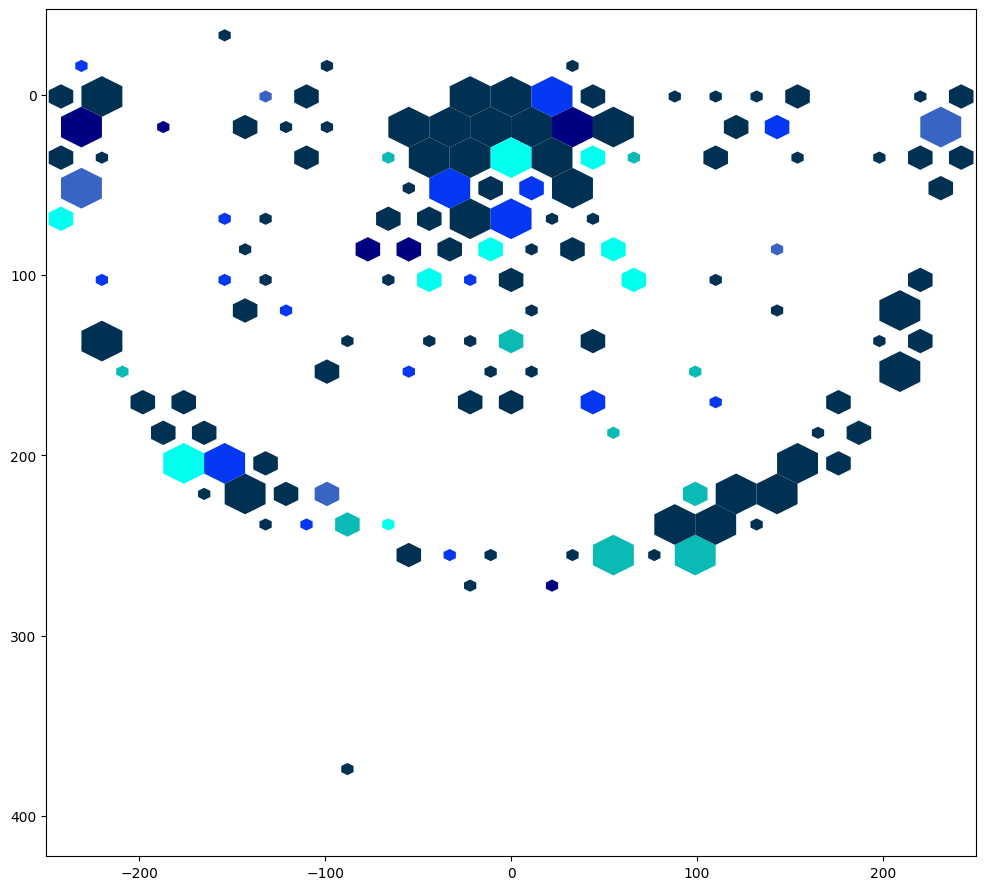

In [161]:
plt.rcParams['figure.figsize'] = (12, 11)

ax = plt.gca()
ax.set_xlim(xlim)
ax.set_ylim(ylim)

################################################################################################
# initialize hex graphs
offsets = hexbin.get_offsets()
orgpath = hexbin.get_paths()[0]
verts = orgpath.vertices
values1 = hexbin.get_array()
values2 = hexbin2.get_array()
ma = values1.max()
patches = []

for offset,val in zip(offsets,values1):
    # Adding condition for minimum size 
    # offset is the respective position of each hexagons
    
    # remove 0 to compare frequency without 0s
    filtered_list = list(filter(lambda num: num != 0, values1))
    
    # we also skip frequency counts that are 0s
    # this is to discount hexbins with no occurences
    # default value hexagons are the frequencies
    if (int(val) == 0):
        continue
    elif (percentileofscore(filtered_list, val) < 33.33):
        #print(percentileofscore(values1, val))
        #print("bot")
        v1 = verts*0.3 + offset
    elif (percentileofscore(filtered_list, val) > 69.99):
        #print(percentileofscore(values1, val))
        #print("top")
        v1 = verts + offset
    else:
        #print("mid")
        v1 = verts*0.6 + offset
    
    path = Path(v1, orgpath.codes)
    patch = PathPatch(path)
    patches.append(patch)

pc = PatchCollection(patches, cmap=cmap, norm=norm)
# sets color
# so hexbin with C=data['FGP']
pc.set_array(values2)

ax.add_collection(pc)
hexbin.remove()
hexbin2.remove()

###################################################################################################

plt.show()

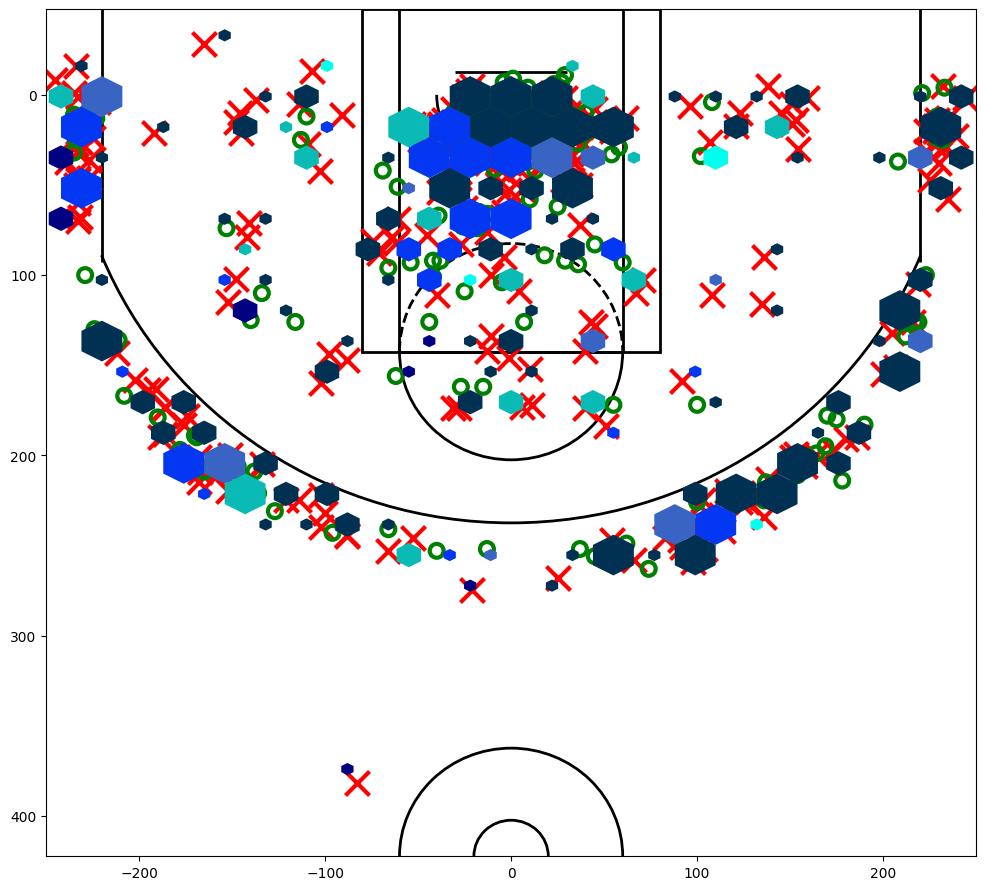

In [188]:
# 調整底圖大小
plt.rcParams['figure.figsize'] = (12, 11)
# 合併球場繪圖 + 投籃分佈圖
# 呼叫初始底圖
ax = plt.gca()
# 去圖x,y軸
#ax.axes.xaxis.set_visible(False)
#ax.axes.yaxis.set_visible(False)
# 設定底圖顏色
ax.set_facecolor("white")

# 設定座標軸範圍
xlim=(-250, 250) 
ylim=(422.5, -47.5)
ax.set_xlim((-250, 250))
ax.set_ylim((422.5, -47.5))
# 繪製球場的基礎元素
lw = 2
color = 'black'

##################################
# 繪製球場
##################################

# Create the basketball hoop
hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

# Create backboard
backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

# The paint
# Create the outer box 0f the paint, width=16ft, height=19ft
outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                        fill=False)
# Create the inner box of the paint, widt=12ft, height=19ft
inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                        fill=False)

# Create free throw top arc
top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                        linewidth=lw, color=color, fill=False)
# Create free throw bottom arc
bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                        linewidth=lw, color=color, linestyle='dashed')
# Restricted Zone, it is an arc with 4ft radius from center of the hoop
restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                    color=color)

# Three point line
# Create the right side 3pt lines, it's 14ft long before it arcs
corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                            color=color)
# Create the right side 3pt lines, it's 14ft long before it arcs
corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
# 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                color=color)

# Center Court
center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                        linewidth=lw, color=color)
center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                        linewidth=lw, color=color)

# List of the court elements to be plotted onto the axes
court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                    bottom_free_throw, restricted, corner_three_a,
                    corner_three_b, three_arc, center_outer_arc,
                    center_inner_arc]


# outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
#                         color=color, fill=False)

# court_elements.append(outer_lines)

# Add the court elements onto the axes
for element in court_elements:
    ax.add_patch(element)

##################################
# 繪製投籃數據
##################################

x_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_X']
y_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_Y']

x_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
y_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']

# plot missed shots
ax.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3)
# plot made shots
ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker="o", s=100, linewidths=3)

##################################
# 繪製熱區圖
##################################

# 聯盟個位置的出手平均及命中率計算
LA = data2.loc[:,['SHOT_ZONE_AREA','SHOT_ZONE_RANGE', 'FGA', 'FGM']].groupby(['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE']).sum()
LA['FGP'] = 1.0*LA['FGM']/LA['FGA']
player = data.groupby(['SHOT_ZONE_AREA','SHOT_ZONE_RANGE','SHOT_MADE_FLAG']).size().unstack(fill_value=0)
player['FGP'] = 1.0*player.loc[:,1]/player.sum(axis=1)
player_vs_league = (player.loc[:,'FGP'] - LA.loc[:,'FGP'])*100  
data_n = pd.merge(data, player_vs_league, on=['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE'], how='right')

# 繪製熱區圖基礎設定
colors = ['#00ffef', '#0ABAB5', '#3964C3', '#0437F2', '#003153', '#000080']
cmap = ListedColormap(colors)
boundaries = [-np.inf, -9, -3, 0, 3, 9, np.inf]
norm = BoundaryNorm(boundaries, cmap.N, clip=True)  
x = data['LOC_X']
y = data['LOC_Y']
hexbin = ax.hexbin(x, y, gridsize=25, cmap=cmap, norm=norm, extent=[-275, 275, -50, 425])
hexbin2 = ax.hexbin(x, y, C=data_n['FGP'], gridsize=25, cmap=cmap, norm=norm, extent=[-275, 275, -50, 425])

offsets = hexbin.get_offsets()
orgpath = hexbin.get_paths()[0]
verts = orgpath.vertices
values1 = hexbin.get_array()
values2 = hexbin2.get_array()
ma = values1.max()
patches = []


for offset,val in zip(offsets,values1):
    # Adding condition for minimum size 
    # offset is the respective position of each hexagons
    
    # remove 0 to compare frequency without 0s
    filtered_list = list(filter(lambda num: num != 0, values1))
    
    # we also skip frequency counts that are 0s
    # this is to discount hexbins with no occurences
    # default value hexagons are the frequencies
    if (int(val) == 0):
        continue
    elif (percentileofscore(filtered_list, val) < 33.33):
        #print(percentileofscore(values1, val))
        #print("bot")
        v1 = verts*0.3 + offset
    elif (percentileofscore(filtered_list, val) > 69.99):
        #print(percentileofscore(values1, val))
        #print("top")
        v1 = verts + offset
    else:
        #print("mid")
        v1 = verts*0.6 + offset
    
    path = Path(v1, orgpath.codes)
    patch = PathPatch(path)
    patches.append(patch)

pc = PatchCollection(patches, cmap=cmap, norm=norm)
# sets color
# so hexbin with C=data['FGP']
pc.set_array(values2)

ax.add_collection(pc)
hexbin.remove()
hexbin2.remove()




plt.show()

In [189]:
data_n.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'FGP'],
      dtype='object')

In [192]:
data_n.SHOT_ZONE_RANGE.unique()

array(['Back Court Shot', '16-24 ft.', '24+ ft.', '8-16 ft.',
       'Less Than 8 ft.'], dtype=object)

In [194]:
data_n.SHOT_ZONE_AREA.unique()

array(['Back Court(BC)', 'Center(C)', 'Left Side Center(LC)',
       'Left Side(L)', 'Right Side Center(RC)', 'Right Side(R)'],
      dtype=object)

In [195]:
data_n.SHOT_TYPE.unique()

array(['3PT Field Goal', '2PT Field Goal'], dtype=object)

In [199]:
data_n.SHOT_MADE_FLAG.unique()

array([0, 1])

In [200]:
data_n.EVENT_TYPE.unique()

array(['Missed Shot', 'Made Shot'], dtype=object)

In [202]:
data_n[data_n['SHOT_TYPE'] == '3PT Field Goal'].groupby(['EVENT_TYPE']).count()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,FGP
EVENT_TYPE,,,,,,,,,,,,,,,,,,,,,,,,
Made Shot,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
Missed Shot,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113


In [ ]:
data_n